In [1]:
!pip install geopandas
!pip install geoplot
!pip install mapclassify

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3 as db

##You may change the file path and output path to your own path before running the code. 

In [3]:
adult_mortality = pd.read_csv('/content/Adult mortality.csv',header=[0,1])
explanation = adult_mortality.columns[2][0]
adult_mortality = adult_mortality.droplevel(level=0, axis=1)
adult_mortality['explanation'] = explanation
adult_mortality

,Country,Year,Both sexes,Male,Female,explanation
0,Afghanistan,2016,245,272,216,Adult mortality rate (probability of dying bet...
1,Afghanistan,2015,233,254,210,Adult mortality rate (probability of dying bet...
2,Afghanistan,2014,234,254,213,Adult mortality rate (probability of dying bet...
3,Afghanistan,2013,235,254,215,Adult mortality rate (probability of dying bet...
4,Afghanistan,2012,242,262,221,Adult mortality rate (probability of dying bet...
...,...,...,...,...,...,...
3106,Zimbabwe,2004,694,725,670,Adult mortality rate (probability of dying bet...
3107,Zimbabwe,2003,697,728,671,Adult mortality rate (probability of dying bet...
3108,Zimbabwe,2002,695,728,667,Adult mortality rate (probability of dying bet...
3109,Zimbabwe,2001,688,723,656,Adult mortality rate (probability of dying bet...


In [4]:
conn = db.connect('/content/test.db')
adult_mortality.to_sql(name='adult_mortality', con=conn)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


adult_mortality has been inserted into database

In [5]:
maternal_mortality = pd.read_csv('/content/Maternal mortality.csv')
maternal_mortality

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths
0,Afghanistan,2017,638 [ 427 - 1 010 ],7 700 [ 5 100 - 12 000 ]
1,Afghanistan,2016,673 [ 457 - 1 040 ],8 100 [ 5 500 - 12 000 ]
2,Afghanistan,2015,701 [ 501 - 1 020 ],8 400 [ 6 000 - 12 000 ]
3,Afghanistan,2014,786 [ 592 - 1 080 ],9 300 [ 7 000 - 13 000 ]
4,Afghanistan,2013,810 [ 617 - 1 080 ],9 600 [ 7 300 - 13 000 ]
...,...,...,...,...
3289,Zimbabwe,2004,686 [ 597 - 784 ],2 800 [ 2 400 - 3 100 ]
3290,Zimbabwe,2003,680 [ 590 - 779 ],2 700 [ 2 300 - 3 100 ]
3291,Zimbabwe,2002,666 [ 577 - 766 ],2 600 [ 2 200 - 3 000 ]
3292,Zimbabwe,2001,629 [ 544 - 723 ],2 400 [ 2 100 - 2 800 ]


In [6]:
maternal_mortality[['Maternal mortality ratio (per 100 000 live births)','Maternal mortality ratio range']] = maternal_mortality['Maternal mortality ratio (per 100 000 live births)'].str.split("[",expand=True)
maternal_mortality[['Number of maternal deaths','Number of maternal deaths range']] = maternal_mortality['Number of maternal deaths'].str.split("[",expand=True)
maternal_mortality

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths,Maternal mortality ratio range,Number of maternal deaths range
0,Afghanistan,2017,638,7 700,427 - 1 010 ],5 100 - 12 000 ]
1,Afghanistan,2016,673,8 100,457 - 1 040 ],5 500 - 12 000 ]
2,Afghanistan,2015,701,8 400,501 - 1 020 ],6 000 - 12 000 ]
3,Afghanistan,2014,786,9 300,592 - 1 080 ],7 000 - 13 000 ]
4,Afghanistan,2013,810,9 600,617 - 1 080 ],7 300 - 13 000 ]
...,...,...,...,...,...,...
3289,Zimbabwe,2004,686,2 800,597 - 784 ],2 400 - 3 100 ]
3290,Zimbabwe,2003,680,2 700,590 - 779 ],2 300 - 3 100 ]
3291,Zimbabwe,2002,666,2 600,577 - 766 ],2 200 - 3 000 ]
3292,Zimbabwe,2001,629,2 400,544 - 723 ],2 100 - 2 800 ]


In [7]:
maternal_mortality['Maternal mortality ratio range'] = maternal_mortality['Maternal mortality ratio range'].str.replace(r']', '')
maternal_mortality['Number of maternal deaths range'] = maternal_mortality['Number of maternal deaths range'].str.replace(r']', '')
maternal_mortality

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths,Maternal mortality ratio range,Number of maternal deaths range
0,Afghanistan,2017,638,7 700,427 - 1 010,5 100 - 12 000
1,Afghanistan,2016,673,8 100,457 - 1 040,5 500 - 12 000
2,Afghanistan,2015,701,8 400,501 - 1 020,6 000 - 12 000
3,Afghanistan,2014,786,9 300,592 - 1 080,7 000 - 13 000
4,Afghanistan,2013,810,9 600,617 - 1 080,7 300 - 13 000
...,...,...,...,...,...,...
3289,Zimbabwe,2004,686,2 800,597 - 784,2 400 - 3 100
3290,Zimbabwe,2003,680,2 700,590 - 779,2 300 - 3 100
3291,Zimbabwe,2002,666,2 600,577 - 766,2 200 - 3 000
3292,Zimbabwe,2001,629,2 400,544 - 723,2 100 - 2 800


In [8]:
conn = db.connect('test.db')
maternal_mortality.to_sql(name='maternal_mortality', con=conn)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


maternal_mortality has been inserted into database

In [9]:
thousands_death = pd.read_csv('/content/Number of deaths (thousands).csv', header = [0,1])
thousands_death

Unnamed: 0_level_0 Unnamed: 1_level_0  \
                Country               Year   
0           Afghanistan               2018   
1           Afghanistan               2017   
2           Afghanistan               2016   
3           Afghanistan               2015   
4           Afghanistan               2014   
...                 ...                ...   
1159           Zimbabwe               2017   
1160           Zimbabwe               2016   
1161           Zimbabwe               2015   
1162           Zimbabwe               2014   
1163           Zimbabwe               2013   

     Number of under-five deaths (thousands)                \
                                  Both sexes   Male Female   
0                                      74278  40312  33966   
1                                      76877  41631  35246   
2                                      79770  43134  36636   
3                                      82918  44733  38185   
4                                      86378  46509  39869   
...                                      ...    ...    ...   
1159                                   22519  12419  10100   
1160                                   23326  12867  10459   
1161                                   25433  14001  11432   
1162                                   27058  14866  12192   
1163                                   29200  15984  13216   

     Number of infant deaths (thousands)                \
                              Both sexes   Male Female   
0                                  57182  31394  25788   
1                                  58846  32244  26602   
2                                  60673  33222  27451   
3                                  62652  34257  28395   
4                                  64808  35410  29398   
...                                  ...    ...    ...   
1159                               16015   9010   7005   
1160                               16693   9396   7297   
1161                               18006  10121   7885   
1162                               19051  10707   8344   
1163                               20265  11363   8902   

     Number of neonatal deaths (thousands)  
                                Both sexes  
0                                    44725  
1                                    45771  
2                                    46963  
3                                    48237  
4                                    49715  
...                                    ...  
1159                                  9696  
1160                                 10235  
1161                                 10815  
1162                                 11447  
1163                                 12063  

[1164 rows x 9 columns]

In [10]:
thousands_death_under5 = thousands_death.iloc[:, [0,1,2,3,4]]
thousands_death_infant = thousands_death.iloc[:, [0,1,5,6,7]]
thousands_death_neonatal = thousands_death.iloc[:, [0,1,8]]

In [11]:
def droplevel(dataframe):
    explanation = dataframe.columns[2][0]
    dataframe = dataframe.droplevel(level=0, axis=1)
    dataframe['explanation'] = explanation
    return dataframe

In [12]:
thousands_death_under5 = droplevel(thousands_death_under5)
thousands_death_infant = droplevel(thousands_death_infant)
thousands_death_neonatal = droplevel(thousands_death_neonatal)


In [13]:
thousands_death_new = pd.concat([thousands_death_under5,thousands_death_infant,thousands_death_neonatal])
thousands_death_new

,Country,Year,Both sexes,Male,Female,explanation
0,Afghanistan,2018,74278,40312.0,33966.0,Number of under-five deaths (thousands)
1,Afghanistan,2017,76877,41631.0,35246.0,Number of under-five deaths (thousands)
2,Afghanistan,2016,79770,43134.0,36636.0,Number of under-five deaths (thousands)
3,Afghanistan,2015,82918,44733.0,38185.0,Number of under-five deaths (thousands)
4,Afghanistan,2014,86378,46509.0,39869.0,Number of under-five deaths (thousands)
...,...,...,...,...,...,...
1159,Zimbabwe,2017,9696,NaN,NaN,Number of neonatal deaths (thousands)
1160,Zimbabwe,2016,10235,NaN,NaN,Number of neonatal deaths (thousands)
1161,Zimbabwe,2015,10815,NaN,NaN,Number of neonatal deaths (thousands)
1162,Zimbabwe,2014,11447,NaN,NaN,Number of neonatal deaths (thousands)


In [14]:
conn = db.connect('test.db')
thousands_death_new.to_sql(name='thousands_death', con=conn)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


#thousands_death_new has been inserted into database

In [15]:
prob_dying = pd.read_csv('/content/Probability of dying per 1000 live births.csv', header = [0,1])
prob_dying

Unnamed: 0_level_0 Unnamed: 1_level_0  \
                Country               Year   
0           Afghanistan               2018   
1           Afghanistan               2017   
2           Afghanistan               2016   
3           Afghanistan               2015   
4           Afghanistan               2014   
...                 ...                ...   
1159           Zimbabwe               2017   
1160           Zimbabwe               2016   
1161           Zimbabwe               2015   
1162           Zimbabwe               2014   
1163           Zimbabwe               2013   

     Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)  \
                                                                                    Both sexes   
0                                                  47.9                                          
1                                                  49.5                                          
2                                                  51.2                                          
3                                                  53.1                                          
4                                                  55.1                                          
...                                                 ...                                          
1159                                               35.4                                          
1160                                               36.3                                          
1161                                               38.5                                          
1162                                               40.4                                          
1163                                               42.8                                          

                   Neonatal mortality rate (per 1000 live births)  \
      Male  Female                                     Both sexes   
0     51.1    44.5                                           37.1   
1     52.7    46.0                                           38.1   
2     54.5    47.7                                           39.3   
3     56.5    49.6                                           40.5   
4     58.6    51.5                                           41.9   
...    ...     ...                                            ...   
1159  39.4    31.2                                           21.5   
1160  40.4    32.0                                           22.3   
1161  42.8    34.0                                           23.1   
1162  44.9    35.6                                           24.2   
1163  47.5    37.9                                           25.3   

     Under-five mortality rate (probability of dying by age 5 per 1000 live births)  \
                                                                         Both sexes   
0                                                  62.3                               
1                                                  64.7                               
2                                                  67.5                               
3                                                  70.4                               
4                                                  73.6                               
...                                                 ...                               
1159                                               49.3                               
1160                                               50.4                               
1161                                               54.3                               
1162                                               57.5                               
1163                                               62.3                               

                    
      Male  Female  
0     65.7    58.7  
1     68.1    61.1  
2     70.9    63.

In [16]:
prob_dying_Infant = prob_dying.iloc[:, [0,1,2,3,4]]
prob_dying_Neonatal = prob_dying.iloc[:, [0,1,5]]
prob_dying_under5 = prob_dying.iloc[:, [0,1,6,7,8]]

In [17]:
prob_dying_Infant = droplevel(prob_dying_Infant)
prob_dying_Neonatal = droplevel(prob_dying_Neonatal)
prob_dying_under5 = droplevel(prob_dying_under5)

In [18]:
prob_dying_new = pd.concat([prob_dying_Infant,prob_dying_under5,prob_dying_Neonatal])
prob_dying_new.rename(columns = {' Both sexes':'Both sexes', ' Male':'Male',' Female':'Female'}, inplace = True)

In [19]:
conn = db.connect('test.db')
prob_dying_new.to_sql(name='prob_dying', con=conn)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


prob_dying_new has been inserted into database

In [20]:
database = r"test.db"
conn = db.connect(database)

In [21]:
prob_death  = pd.read_sql_query("SELECT * FROM prob_dying", conn)
prob_death 

,index,Country,Year,Both sexes,Male,Female,explanation
0,0,Afghanistan,2018,47.9,51.1,44.5,Infant mortality rate (probability of dying be...
1,1,Afghanistan,2017,49.5,52.7,46.0,Infant mortality rate (probability of dying be...
2,2,Afghanistan,2016,51.2,54.5,47.7,Infant mortality rate (probability of dying be...
3,3,Afghanistan,2015,53.1,56.5,49.6,Infant mortality rate (probability of dying be...
4,4,Afghanistan,2014,55.1,58.6,51.5,Infant mortality rate (probability of dying be...
...,...,...,...,...,...,...,...
3487,1159,Zimbabwe,2017,21.5,NaN,NaN,Neonatal mortality rate (per 1000 live births)
3488,1160,Zimbabwe,2016,22.3,NaN,NaN,Neonatal mortality rate (per 1000 live births)
3489,1161,Zimbabwe,2015,23.1,NaN,NaN,Neonatal mortality rate (per 1000 live births)
3490,1162,Zimbabwe,2014,24.2,NaN,NaN,Neonatal mortality rate (per 1000 live births)


In [22]:
dic = {'Bolivia (Plurinational State of)':'Bolivia',
     'Bosnia and Herzegovina':'Bosnia and Herz.',
     'Brunei Darussalam':'Brunei',
     'Central African Republic':'Central African Rep.',
     'Democratic Republic of the Congo':'Dem. Rep. Congo',
     'Dominican Republic':'Dominican Rep.',
     'Equatorial Guinea':'Eq. Guinea',
     'Iran (Islamic Republic of)':'Iran',
     "Lao People's Democratic Republic":'Laos',
     'Equatorial Guinea':'Eq. Guinea',
     "Democratic People's Republic of Korea":'North Korea',
     "Republic of Korea":'South Korea',
     "Republic of Moldova":'Moldova',
     "Republic of North Macedonia":'Macedonia',
     "Russian Federation":'Russia',
     "Solomon Islands":'Solomon Is.',
     "South Sudan":'S. Sudan',
     "United Kingdom of Great Britain and Northern Ireland":'United Kingdom',
     "United Republic of Tanzania":'Tanzania',
     "Venezuela (Bolivarian Republic of)":'Venezuela',
     "Syrian Arab Republic":'Syria',
     "Eswatini":'eSwatini',
     "Viet Nam":'Vietnam'
       }

prob_death['Country'].replace(dic,inplace = True)


In [23]:
import geopandas
import geoplot
import mapclassify
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)

In [24]:
#There are three choices for explanation:'Under-five mortality rate (probability of dying by age 5 per 1000 live births)',
#'Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)',
#'Neonatal mortality rate (per 1000 live births)'
#There are three choices for sex: Both sexes, Male, Female
def plot_df(explanation,sex): 
  new_df = prob_death[prob_death['explanation'] == explanation]
  df_tmp = new_df[['Country','Year',sex]]
  tmp1 = df_tmp.pivot(index='Country', columns='Year', values=sex).reset_index()
  plotdf = world.merge(tmp1,left_on = 'name',right_on = 'Country',how = 'inner')

  return plotdf



In [25]:
explanation_lst = prob_death.explanation.unique()
plotdf_lst = []
sex = ['Both sexes','Male','Female']
for i in explanation_lst:
  for j in sex:
    plotdf_tmp = plot_df(i,j)
    plotdf_lst.append(plotdf_tmp)


In [26]:
prob_death_2018  = pd.read_sql_query("SELECT * FROM prob_dying WHERE Year=2018", conn)
prob_death_2018 

,index,Country,Year,Both sexes,Male,Female,explanation
0,0,Afghanistan,2018,47.9,51.1,44.5,Infant mortality rate (probability of dying be...
1,6,Albania,2018,7.8,8.5,7.2,Infant mortality rate (probability of dying be...
2,12,Algeria,2018,20.1,21.5,18.7,Infant mortality rate (probability of dying be...
3,18,Andorra,2018,2.7,3.0,2.5,Infant mortality rate (probability of dying be...
4,24,Angola,2018,51.6,56.7,46.2,Infant mortality rate (probability of dying be...
...,...,...,...,...,...,...,...
577,1134,Venezuela (Bolivarian Republic of),2018,15.1,NaN,NaN,Neonatal mortality rate (per 1000 live births)
578,1140,Viet Nam,2018,10.6,NaN,NaN,Neonatal mortality rate (per 1000 live births)
579,1146,Yemen,2018,27.0,NaN,NaN,Neonatal mortality rate (per 1000 live births)
580,1152,Zambia,2018,23.5,NaN,NaN,Neonatal mortality rate (per 1000 live births)


In [27]:
prob_death_both = prob_death_2018.pivot(index=['Country','Year'], columns='explanation', values='Both sexes').reset_index()
prob_death_both['total'] = prob_death_both['Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)']+prob_death_both['Neonatal mortality rate (per 1000 live births)']+prob_death_both['Under-five mortality rate (probability of dying by age 5 per 1000 live births)']


In [28]:
prob_death_both_top = prob_death_both.sort_values('total',ascending = False).head(10)
prob_death_both_lower = prob_death_both.sort_values('total',ascending = True).head(10)

In [29]:
prob_death_both_top

explanation,Country,Year,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Neonatal mortality rate (per 1000 live births),Under-five mortality rate (probability of dying by age 5 per 1000 live births),total
32,Central African Republic,2018,84.5,41.2,116.5,242.2
160,Somalia,2018,76.6,37.5,121.5,235.6
125,Nigeria,2018,75.7,36.0,119.9,231.6
33,Chad,2018,71.4,34.2,119.0,224.6
155,Sierra Leone,2018,78.5,32.8,105.1,216.4
162,South Sudan,2018,63.7,40.0,98.6,202.3
71,Guinea,2018,64.9,31.1,100.8,196.8
105,Mali,2018,62.0,32.7,97.8,192.5
18,Benin,2018,60.5,31.3,93.0,184.8
47,Democratic Republic of the Congo,2018,68.2,28.3,88.1,184.6


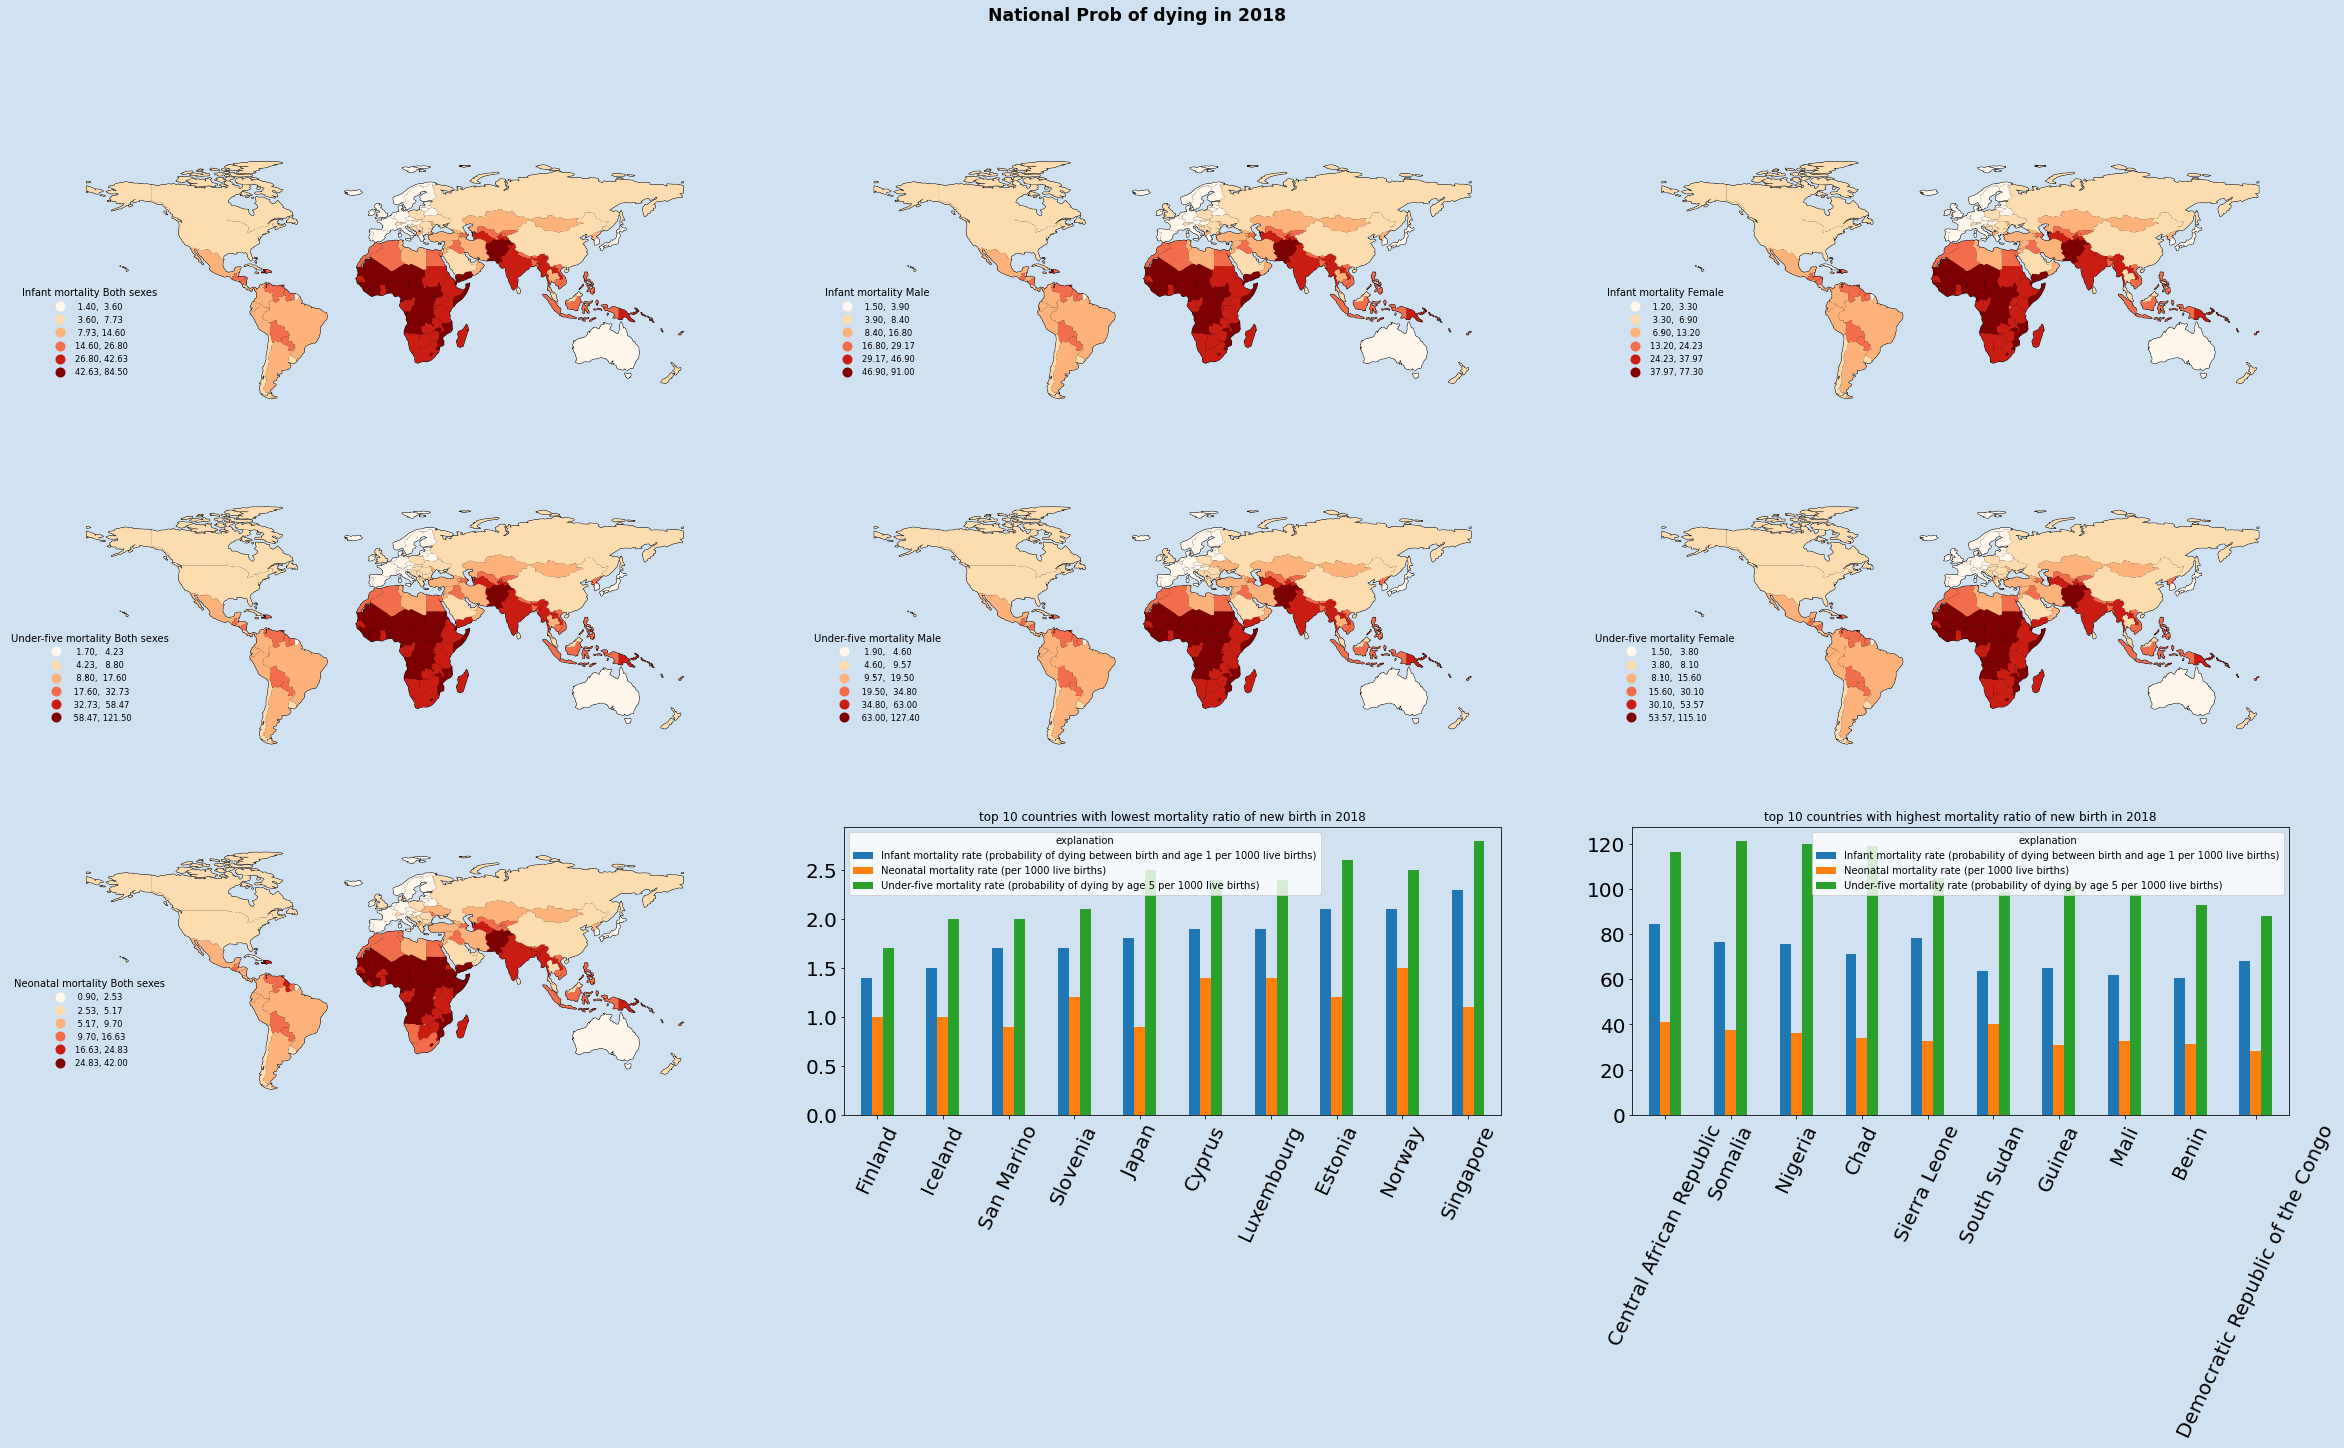

In [30]:

fig, axs = plt.subplots(
    nrows = 3,
    ncols = 3,
    figsize = (40,18),
    facecolor = plt.cm.Blues(.2))
fig.suptitle('National Prob of dying in 2018',
             fontsize = 'xx-large',  
             fontweight = 'bold')
for ax in axs.flatten():
    ax.set_facecolor(plt.cm.Blues(.2))

for i in range(7):
  x = i//3
  y = i%3
  plotdf = plotdf_lst[i]
  plotdf_year = plotdf[2018]
  ax1 = axs[x][y]
  plotdf.plot(
      ax = ax1,
      color = 'white',
      edgecolor = 'black'
  )

  plotdf.plot(
      column = plotdf_year,
      scheme = 'quantiles',
      k = 6,
      cmap = 'OrRd',
      ax = ax1,
      legend = True,
      legend_kwds = {'title': " ".join(explanation_lst[x].split()[:2] + [sex[y]]),
                    'title_fontsize': 'medium',
                    'frameon': False,
                    'loc': 'lower center',
                    'bbox_to_anchor': (-0.2, 0.1, 0.5, 1),
                    'fontsize': 'small',
                    },
  )
  [spine.set_visible(False) for spine in ax1.spines.values()]
  ax1.xaxis.set_visible(False)
  ax1.yaxis.set_visible(False)

ax2 = axs[2][1]
ax2.title.set_text('top 10 countries with lowest mortality ratio of new birth in 2018')
prob_death_both_lower[['Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)','Neonatal mortality rate (per 1000 live births)','Under-five mortality rate (probability of dying by age 5 per 1000 live births)']].plot(ax = ax2, kind = 'bar')
x = prob_death_both_lower['Country']
ax2.set_xticklabels(x, rotation=65)
ax2.tick_params(axis='both', which='major', labelsize=20)



ax3 = axs[2][2]
ax3.title.set_text('top 10 countries with highest mortality ratio of new birth in 2018')
prob_death_both_top[['Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)','Neonatal mortality rate (per 1000 live births)','Under-five mortality rate (probability of dying by age 5 per 1000 live births)']].plot(ax = ax3, kind = 'bar')
x = prob_death_both_top['Country']
ax3.set_xticklabels(x, rotation=65)
ax3.tick_params(axis='both', which='major', labelsize=20)

plt.show()

The plot above shows the mortality ratio of different age stage of new lives in different countries and different sexes, we can see that the highest ratio of all stages and sexes appears in Africa and Southern Asian. 

Then I'd like to see the death ratio of different age in Singapore in these years

In [31]:
prob_death  = pd.read_sql_query("SELECT Country, Year, `Both sexes`, explanation FROM prob_dying WHERE Country is 'Singapore'", conn)
prob_death 

,Country,Year,Both sexes,explanation
0,Singapore,2018,2.3,Infant mortality rate (probability of dying be...
1,Singapore,2017,2.2,Infant mortality rate (probability of dying be...
2,Singapore,2016,2.2,Infant mortality rate (probability of dying be...
3,Singapore,2015,2.2,Infant mortality rate (probability of dying be...
4,Singapore,2014,2.2,Infant mortality rate (probability of dying be...
5,Singapore,2013,2.2,Infant mortality rate (probability of dying be...
6,Singapore,2018,2.8,Under-five mortality rate (probability of dyin...
7,Singapore,2017,2.8,Under-five mortality rate (probability of dyin...
8,Singapore,2016,2.7,Under-five mortality rate (probability of dyin...
9,Singapore,2015,2.7,Under-five mortality rate (probability of dyin...


In [32]:
prob_death_new = prob_death.pivot(index=['Country','Year'], columns='explanation', values='Both sexes').reset_index()
prob_death_new

explanation,Country,Year,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Neonatal mortality rate (per 1000 live births),Under-five mortality rate (probability of dying by age 5 per 1000 live births)
0,Singapore,2013,2.2,1.0,2.7
1,Singapore,2014,2.2,1.0,2.7
2,Singapore,2015,2.2,1.0,2.7
3,Singapore,2016,2.2,1.0,2.7
4,Singapore,2017,2.2,1.1,2.8
5,Singapore,2018,2.3,1.1,2.8


In [33]:
adult_mr  = pd.read_sql_query("SELECT * FROM adult_mortality WHERE Country is 'Singapore'", conn)
adult_mr  

,index,Country,Year,Both sexes,Male,Female,explanation
0,2482,Singapore,2016,51,65,38,Adult mortality rate (probability of dying bet...
1,2483,Singapore,2015,54,67,40,Adult mortality rate (probability of dying bet...
2,2484,Singapore,2014,55,69,40,Adult mortality rate (probability of dying bet...
3,2485,Singapore,2013,56,72,40,Adult mortality rate (probability of dying bet...
4,2486,Singapore,2012,57,71,44,Adult mortality rate (probability of dying bet...
5,2487,Singapore,2011,59,75,43,Adult mortality rate (probability of dying bet...
6,2488,Singapore,2010,60,77,43,Adult mortality rate (probability of dying bet...
7,2489,Singapore,2009,62,80,44,Adult mortality rate (probability of dying bet...
8,2490,Singapore,2008,67,86,49,Adult mortality rate (probability of dying bet...
9,2491,Singapore,2007,68,87,48,Adult mortality rate (probability of dying bet...


In [34]:
adult_mr = adult_mr.sort_values('Year')
adult_mr

,index,Country,Year,Both sexes,Male,Female,explanation
16,2498,Singapore,2000,79,100,58,Adult mortality rate (probability of dying bet...
15,2497,Singapore,2001,77,97,56,Adult mortality rate (probability of dying bet...
14,2496,Singapore,2002,76,97,55,Adult mortality rate (probability of dying bet...
13,2495,Singapore,2003,73,94,52,Adult mortality rate (probability of dying bet...
12,2494,Singapore,2004,73,90,55,Adult mortality rate (probability of dying bet...
11,2493,Singapore,2005,74,95,53,Adult mortality rate (probability of dying bet...
10,2492,Singapore,2006,71,88,54,Adult mortality rate (probability of dying bet...
9,2491,Singapore,2007,68,87,48,Adult mortality rate (probability of dying bet...
8,2490,Singapore,2008,67,86,49,Adult mortality rate (probability of dying bet...
7,2489,Singapore,2009,62,80,44,Adult mortality rate (probability of dying bet...


In [35]:
maternal_mr = pd.read_sql_query("SELECT Country, Year, `Maternal mortality ratio (per 100 000 live births)` FROM maternal_mortality WHERE Country is 'Singapore'", conn)
maternal_mr 

,Country,Year,Maternal mortality ratio (per 100 000 live births)
0,Singapore,2017,8
1,Singapore,2016,8
2,Singapore,2015,9
3,Singapore,2014,8
4,Singapore,2013,9
5,Singapore,2012,10
6,Singapore,2011,10
7,Singapore,2010,10
8,Singapore,2009,10
9,Singapore,2008,11


In [36]:
## change the unit of maternal_mr to match the unit of others
maternal_mr['Maternal mortality ratio (per 100 000 live births)'] = maternal_mr['Maternal mortality ratio (per 100 000 live births)'].astype(int)
maternal_mr['Maternal mortality ratio (per 1000 live births)'] = maternal_mr['Maternal mortality ratio (per 100 000 live births)']/100
maternal_mr

,Country,Year,Maternal mortality ratio (per 100 000 live births),Maternal mortality ratio (per 1000 live births)
0,Singapore,2017,8,0.08
1,Singapore,2016,8,0.08
2,Singapore,2015,9,0.09
3,Singapore,2014,8,0.08
4,Singapore,2013,9,0.09
5,Singapore,2012,10,0.10
6,Singapore,2011,10,0.10
7,Singapore,2010,10,0.10
8,Singapore,2009,10,0.10
9,Singapore,2008,11,0.11


In [37]:
maternal_mr = maternal_mr.sort_values('Year')
maternal_mr


,Country,Year,Maternal mortality ratio (per 100 000 live births),Maternal mortality ratio (per 1000 live births)
17,Singapore,2000,13,0.13
16,Singapore,2001,13,0.13
15,Singapore,2002,14,0.14
14,Singapore,2003,13,0.13
13,Singapore,2004,14,0.14
12,Singapore,2005,13,0.13
11,Singapore,2006,13,0.13
10,Singapore,2007,12,0.12
9,Singapore,2008,11,0.11
8,Singapore,2009,10,0.10


In [38]:
import numpy as np
import matplotlib.pyplot as plt


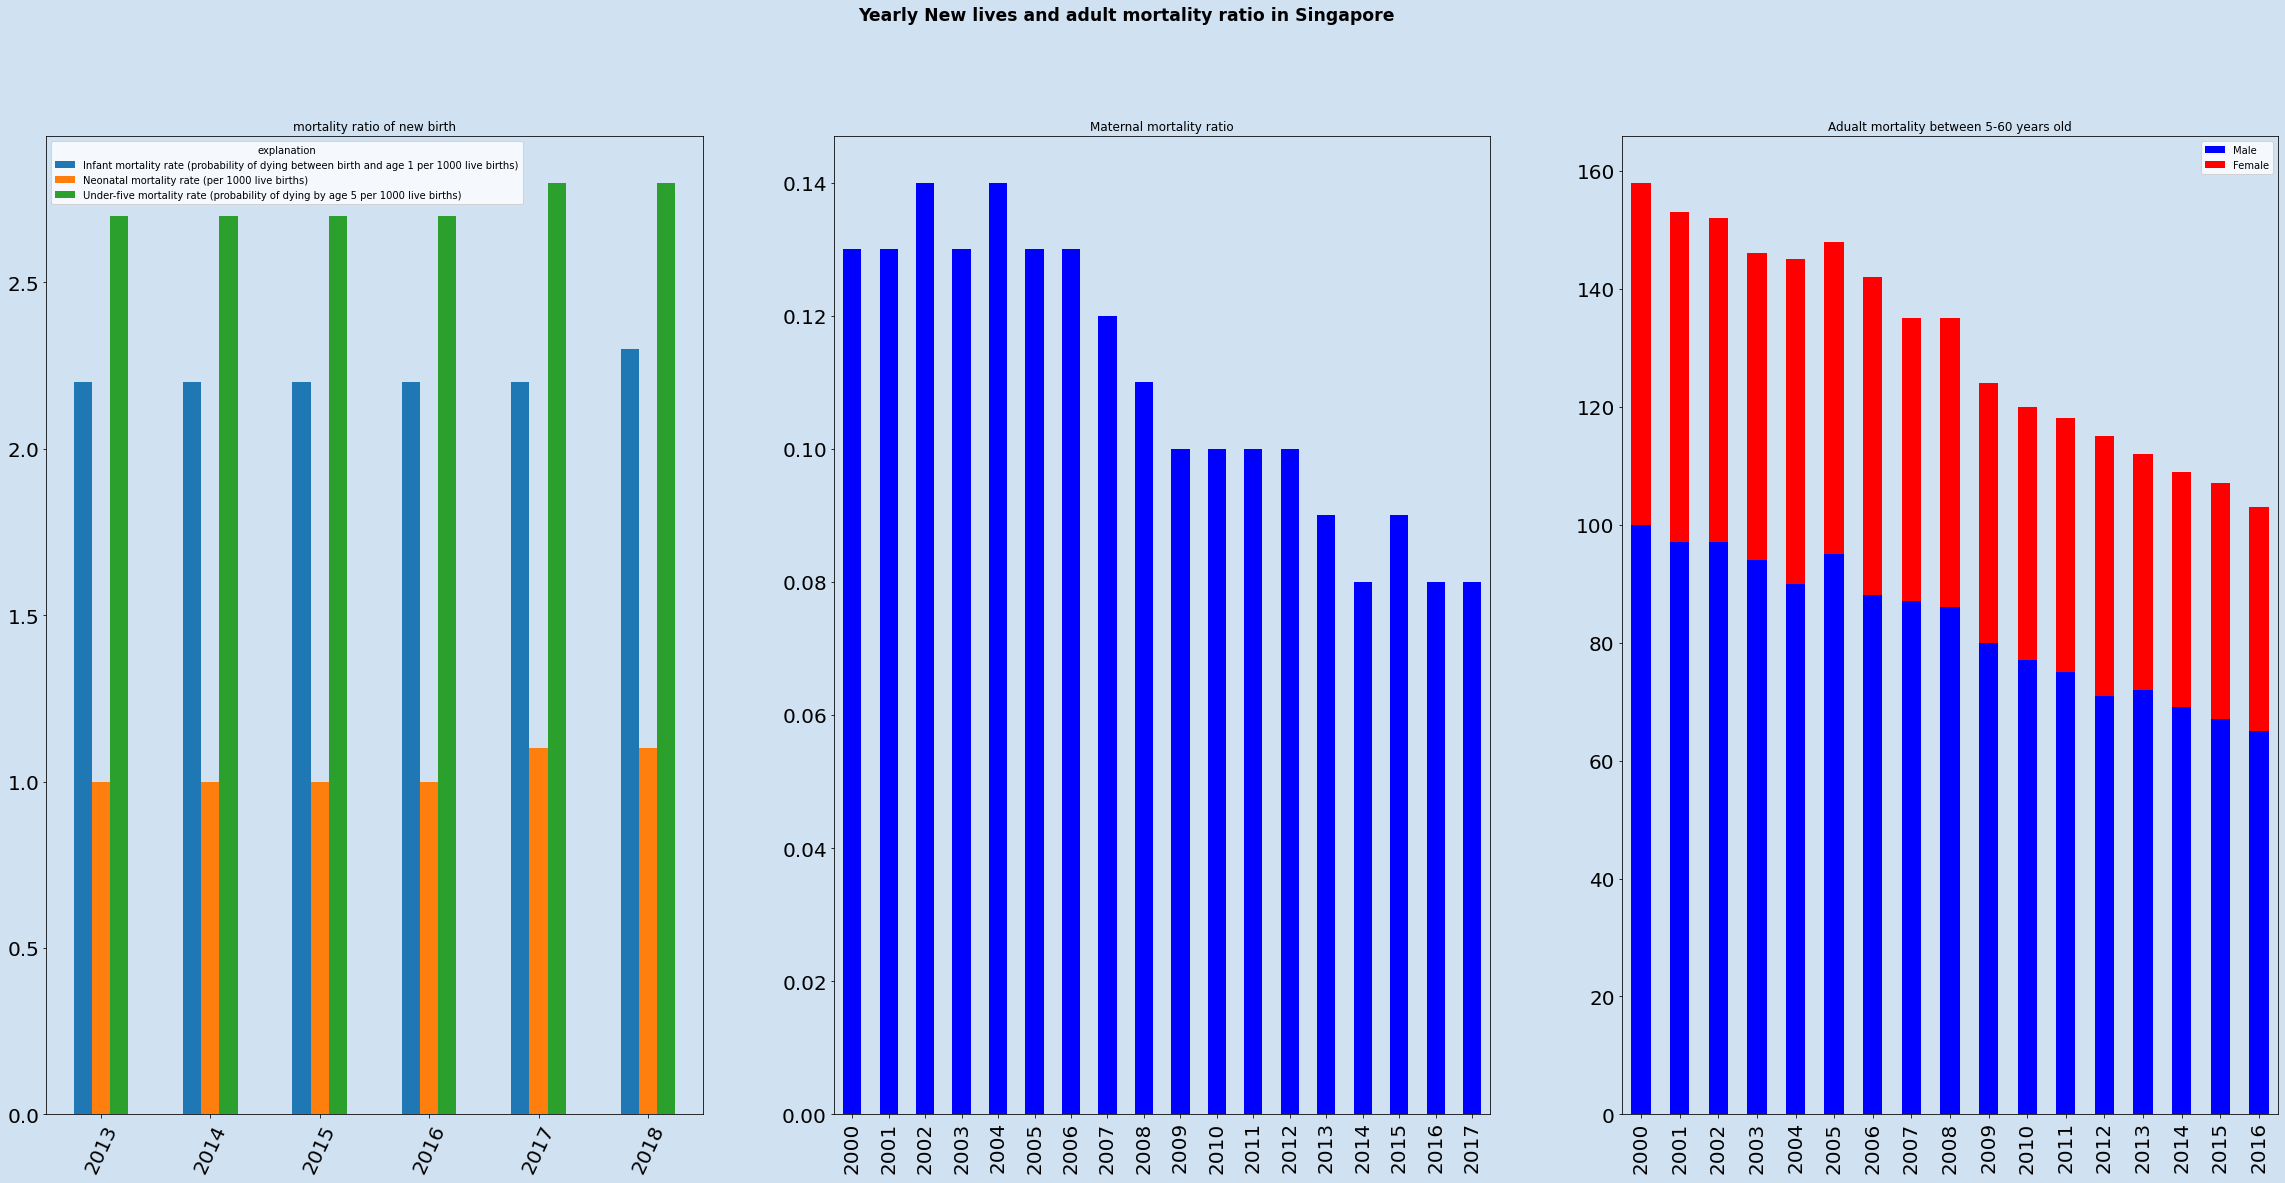

In [39]:
fig, axs = plt.subplots(
    nrows = 1,
    ncols = 3,
    figsize = (40,18),
    facecolor = plt.cm.Blues(.2))
fig.suptitle('Yearly New lives and adult mortality ratio in Singapore',
             fontsize = 'xx-large',  
             fontweight = 'bold')
for ax in axs.flatten():
    ax.set_facecolor(plt.cm.Blues(.2))


ax1 = axs[0]
ax1.title.set_text('mortality ratio of new birth')
prob_death_new[['Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)','Neonatal mortality rate (per 1000 live births)','Under-five mortality rate (probability of dying by age 5 per 1000 live births)']].plot(ax = ax1, kind = 'bar')
years = prob_death_new['Year']
idx = np.asarray([i for i in range(len(years))])
ax1.set_xticks(idx)
ax1.set_xticklabels(years, rotation=65)
ax1.tick_params(axis='both', which='major', labelsize=20)

ax2 = axs[1]
ax2.title.set_text('Maternal mortality ratio')
maternal_mr['Maternal mortality ratio (per 1000 live births)'].plot(ax = ax2, kind='bar', color='blue')

years = maternal_mr['Year']
ax2.set_xticklabels(years)
ax2.tick_params(axis='both', which='major', labelsize=20)

ax3 = axs[2]
ax3.title.set_text('Adualt mortality between 5-60 years old')
x = adult_mr.Year
y1 = adult_mr.Male
y2 = adult_mr.Female
y1.plot(ax = ax3, kind = 'bar', color = 'blue')
y2.plot(ax = ax3, kind = 'bar', bottom = y1, color = 'red')
ax3.set_xticklabels(x)
ax3.tick_params(axis='both', which='major', labelsize=20)

plt.legend()
plt.show()

From the plot above we can see that in Singapore Adualt mortality decreased a lot from 2000 to 2016 of both sexes, Maternal mortality also descreased from year 2004 which is the highest point in the last 17 years.
However, there is no significant descrease in new birth mortality ratios, the mortality ratio of new birth 3 stages increased slightly in 2017 and 2018.

The last point, I'd like to check the difference of male and female mortality in different countries.

In [41]:
adult_mr_all  = pd.read_sql_query("SELECT Country, Year, `Both sexes`, Male, Female, (Male-Female) as gender_diff FROM adult_mortality", conn)
adult_mr_all 

,Country,Year,Both sexes,Male,Female,gender_diff
0,Afghanistan,2016,245,272,216,56
1,Afghanistan,2015,233,254,210,44
2,Afghanistan,2014,234,254,213,41
3,Afghanistan,2013,235,254,215,39
4,Afghanistan,2012,242,262,221,41
...,...,...,...,...,...,...
3106,Zimbabwe,2004,694,725,670,55
3107,Zimbabwe,2003,697,728,671,57
3108,Zimbabwe,2002,695,728,667,61
3109,Zimbabwe,2001,688,723,656,67


In [42]:
adult_mr_avg = adult_mr_all.groupby('Year').mean().reset_index()
adult_mr_avg

,Year,Both sexes,Male,Female,gender_diff
0,2000,220.420765,256.923497,183.125683,73.797814
1,2001,218.076503,253.579235,182.027322,71.551913
2,2002,217.213115,252.448087,181.360656,71.087432
3,2003,216.136612,250.907104,180.907104,70.000000
4,2004,213.579235,247.967213,178.612022,69.355191
5,2005,209.732240,244.131148,174.836066,69.295082
6,2006,204.912568,239.327869,169.918033,69.409836
7,2007,199.300546,233.524590,164.535519,68.989071
8,2008,193.786885,227.972678,159.196721,68.775956
9,2009,187.601093,221.322404,153.595628,67.726776


In [43]:
adult_mr_country = adult_mr_all.groupby('Country').mean().reset_index()
adult_mr_country_both = adult_mr_country.sort_values('Both sexes',ascending = False).head(10)
adult_mr_country_both

,Country,Year,Both sexes,Male,Female,gender_diff
182,Zimbabwe,2008.0,549.352941,586.882353,518.117647,68.764706
93,Lesotho,2008.0,536.235294,568.176471,515.705882,52.470588
55,Eswatini,2008.0,529.000000,587.058824,481.000000,106.058824
31,Central African Republic,2008.0,491.647059,502.294118,481.823529,20.470588
145,Sierra Leone,2008.0,452.117647,461.117647,443.117647,18.000000
181,Zambia,2008.0,446.764706,478.529412,418.058824,60.470588
43,Côte d'Ivoire,2008.0,437.117647,452.000000,417.705882,34.294118
21,Botswana,2008.0,431.294118,474.588235,391.764706,82.823529
99,Malawi,2008.0,424.529412,468.058824,387.176471,80.882353
111,Mozambique,2008.0,416.941176,440.941176,395.882353,45.058824


In [44]:
adult_mr_country_dif = adult_mr_country.sort_values('gender_diff',ascending = False).head(10)
adult_mr_country_dif

,Country,Year,Both sexes,Male,Female,gender_diff
135,Russian Federation,2008.0,269.588235,388.000000,144.294118,243.705882
170,Ukraine,2008.0,238.647059,346.294118,129.588235,216.705882
14,Belarus,2008.0,222.352941,328.352941,113.647059,214.705882
85,Kazakhstan,2008.0,252.529412,356.058824,147.235294,208.823529
96,Lithuania,2008.0,199.411765,296.117647,102.352941,193.764706
91,Latvia,2008.0,193.352941,283.588235,105.176471,178.411765
51,El Salvador,2008.0,198.058824,285.647059,118.411765,167.235294
132,Republic of Moldova,2008.0,207.764706,288.352941,128.764706,159.588235
108,Mongolia,2008.0,242.882353,320.176471,162.470588,157.705882
54,Estonia,2008.0,164.882353,243.411765,86.647059,156.764706


In [45]:
adult_mr_country['Country'].replace(dic,inplace = True)
df_tmp = adult_mr_country[['Country','gender_diff']]
plotdf = world.merge(df_tmp,left_on = 'name',right_on = 'Country',how = 'inner')


No handles with labels found to put in legend.


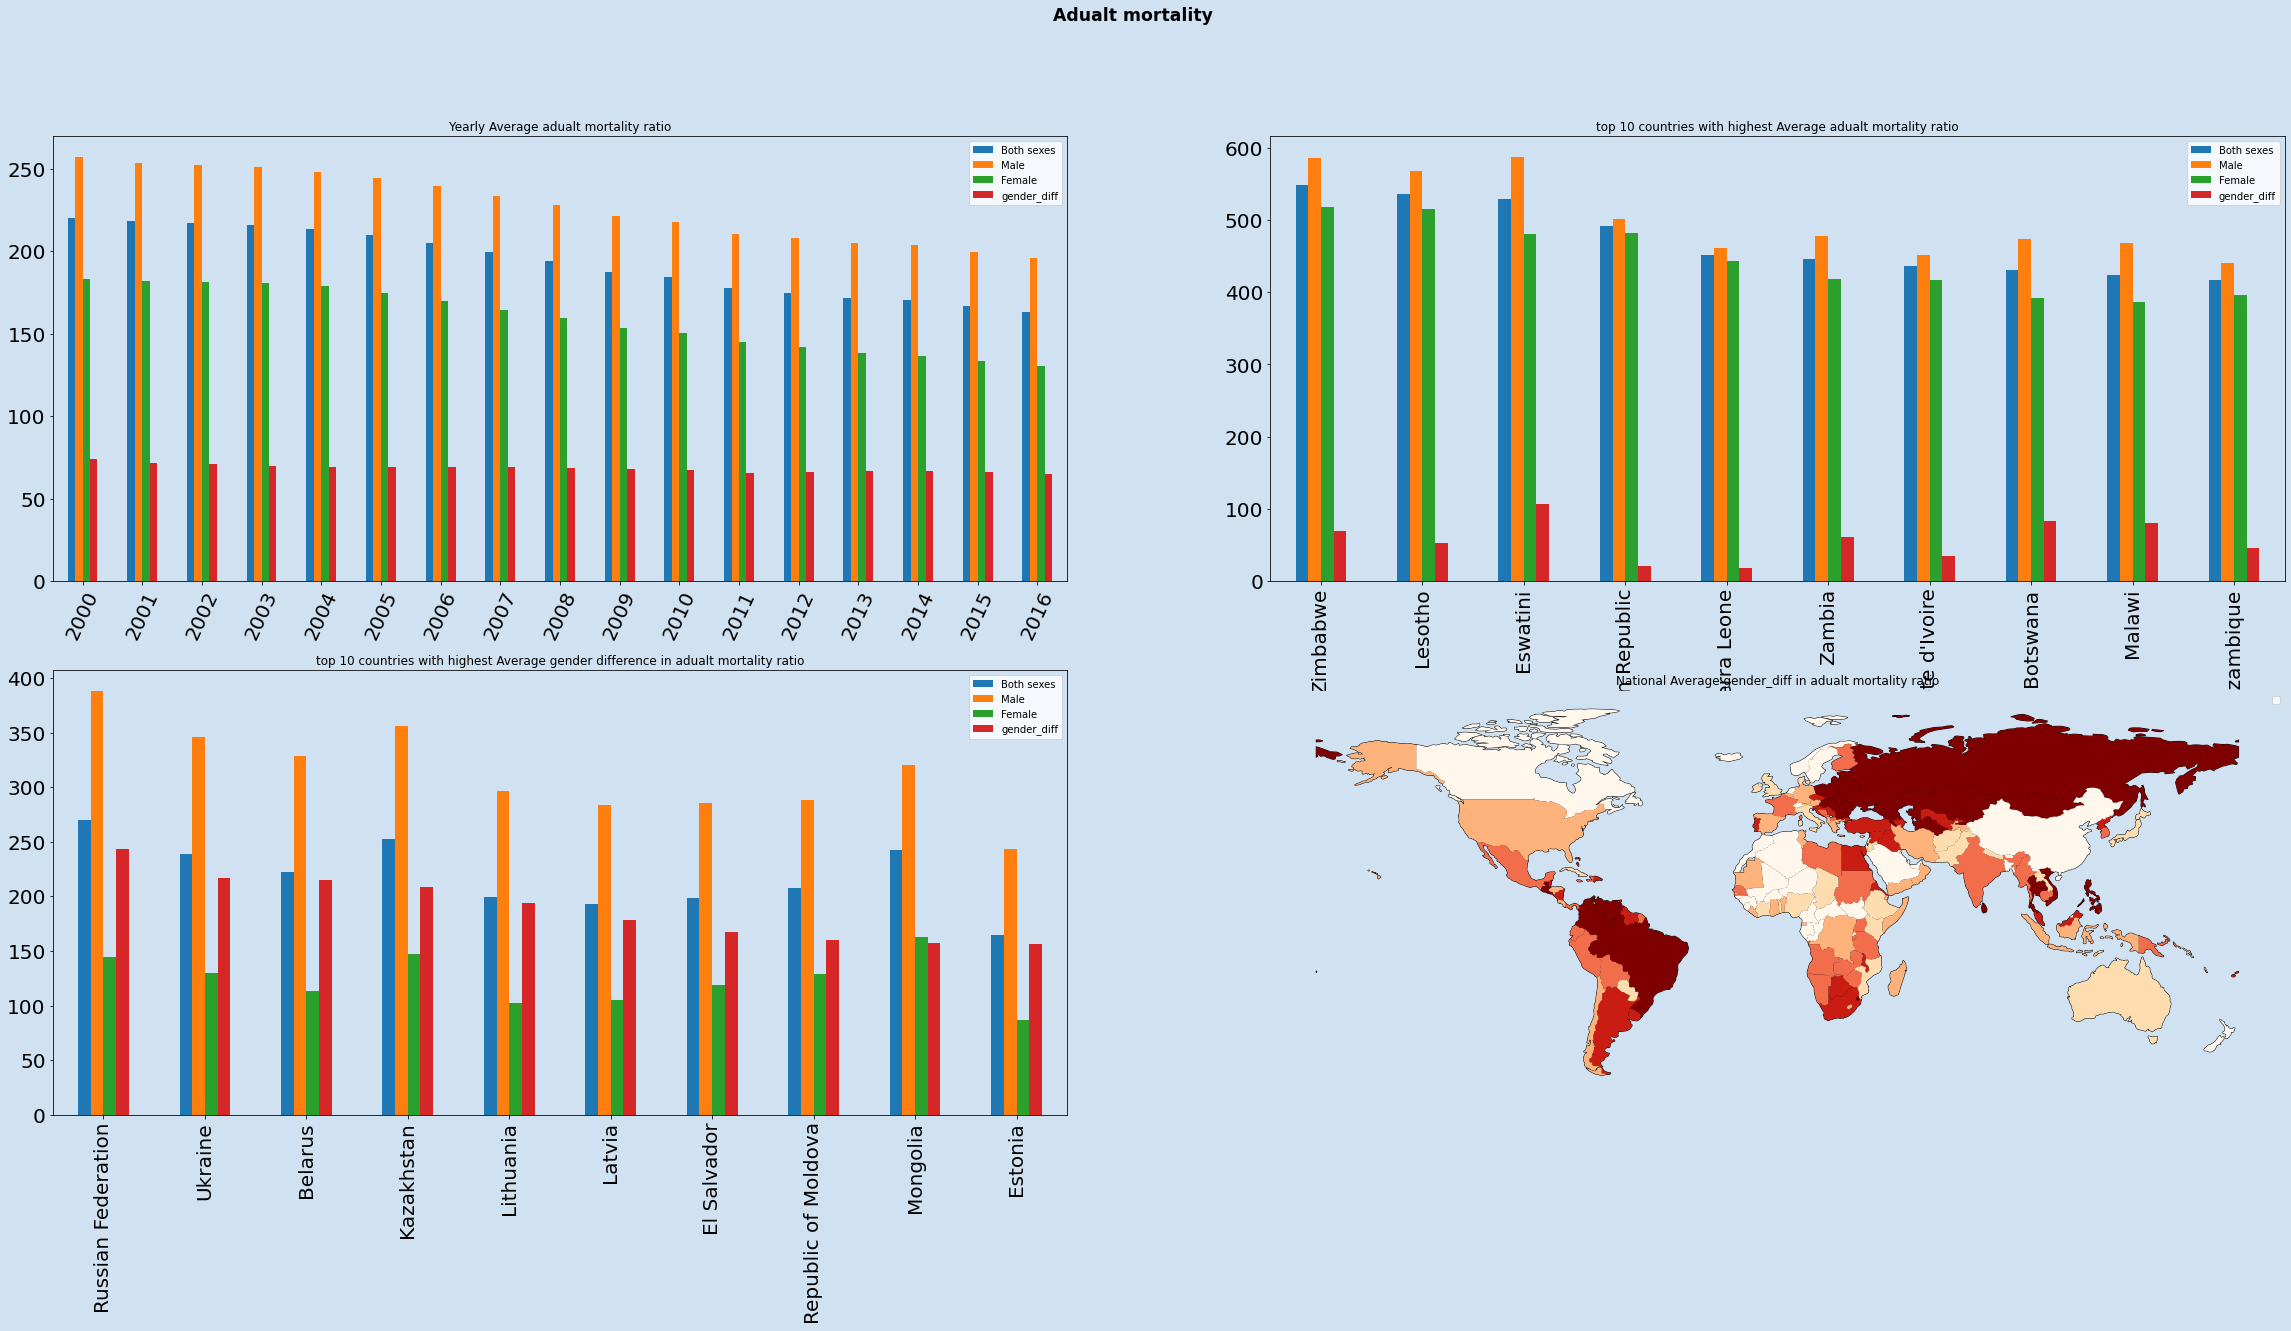

In [46]:
fig, axs = plt.subplots(
    nrows = 2,
    ncols = 2,
    figsize = (40,18),
    facecolor = plt.cm.Blues(.2))
fig.suptitle('Adualt mortality',
             fontsize = 'xx-large',  
             fontweight = 'bold')
for ax in axs.flatten():
    ax.set_facecolor(plt.cm.Blues(.2))


ax1 = axs[0][0]
ax1.title.set_text('Yearly Average adualt mortality ratio')
adult_mr_avg[['Both sexes','Male','Female','gender_diff']].plot(ax = ax1, kind = 'bar')
years = adult_mr_avg['Year']
idx = np.asarray([i for i in range(len(years))])
ax1.set_xticks(idx)
ax1.set_xticklabels(years, rotation=65)
ax1.tick_params(axis='both', which='major', labelsize=20)


ax2 = axs[0][1]
ax2.title.set_text('top 10 countries with highest Average adualt mortality ratio')
adult_mr_country_both[['Both sexes','Male','Female','gender_diff']].plot(ax = ax2, kind='bar')

x = adult_mr_country_both['Country']
ax2.set_xticklabels(x)
ax2.tick_params(axis='both', which='major', labelsize=20)


ax3 = axs[1][0]
ax3.title.set_text('top 10 countries with highest Average gender difference in adualt mortality ratio')
adult_mr_country_dif[['Both sexes','Male','Female','gender_diff']].plot(ax = ax3, kind='bar')

x = adult_mr_country_dif['Country']
ax3.set_xticklabels(x)
ax3.tick_params(axis='both', which='major', labelsize=20)

ax4 = axs[1][1]
ax4.title.set_text('National Average gender_diff in adualt mortality ratio')
plotdf.plot(
    ax = ax4,
    color = 'white',
    edgecolor = 'black'
)

plotdf.plot(
    column = plotdf['gender_diff'],
    scheme = 'quantiles',
    k = 6,
    cmap = 'OrRd',
    ax = ax4,
    legend = True,
    legend_kwds = {'title': 'gender difference',
                  'title_fontsize': 'medium',
                  'frameon': False,
                  'loc': 'lower center',
                  'bbox_to_anchor': (-0.2, 0.1, 0.5, 1),
                  'fontsize': 'small',
                  },
)
[spine.set_visible(False) for spine in ax4.spines.values()]
ax4.xaxis.set_visible(False)
ax4.yaxis.set_visible(False)


plt.legend()
plt.show()

From the plot above we can see that, adualt mortality ratio decreased a lot from 2000 to 2016.
Most of thoese countries with highest gender morality difference are located in South America, Russia and South-Eastern Asia.
